# Homework week 12 Machine Learning Zoomcamp
[Sebasti√°n Ayala Ruano](https://sayalaruano.github.io/)

In this homework, we'll deploy the dogs vs cats model we trained in the previous homework.

Download the model from here:

https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats-model/dogs_cats_10_0.687.h5

In [74]:
# Imports 
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
import tensorflow.lite as tflite
from PIL import Image

tf.__version__

'2.6.0'

## Load and test the TensorFlow Model

In [3]:
model = keras.models.load_model('dogs_cats_10_0.687.h5')

2021-11-27 14:08:17.792617: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-27 14:08:17.792654: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-27 14:08:17.792687: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (asayalar): /proc/driver/nvidia/version does not exist
2021-11-27 14:08:17.793150: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-27 14:08:18.295049: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 44859392 exceeds 1

In [32]:
img = load_img('cat.jpg', target_size=(150, 150))

x = np.array(img)
X = np.array([x])
X.shape

(1, 150, 150, 3)

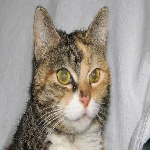

In [27]:
img

In [28]:
preds = model.predict(X)

In [29]:
preds

array([[1.]], dtype=float32)

In [30]:
classes = [
    'cat',
    'dog'
]

In [31]:
dict(zip(classes, preds[0]))

{'cat': 1.0}

## Convert Keras to TF-Lite


In [38]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('dogs_cats_10_0.687.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

2021-11-27 13:20:15.050459: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpum3sf4b5/assets


2021-11-27 13:20:17.937231: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-11-27 13:20:17.937642: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-11-27 13:20:18.048814: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.018ms.
  function_optimizer: function_optimizer did nothing. time = 0.003ms.

2021-11-27 13:20:20.684551: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-11-27 13:20:20.684628: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
2021-11-27 13:20:21.688865: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:210] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


In [11]:
!ls -lh

total 129M
-rwxrwxrwx 1 asayalar asayalar  24K Sep 20  2013 cat.jpg
-rwxrwxrwx 1 asayalar asayalar  303 Nov 27 12:20 Dockerfile
-rwxrwxrwx 1 asayalar asayalar  32K Sep 20  2013 dog.jpg
-rwxrwxrwx 1 asayalar asayalar  86M Nov 27 12:24 dogs_cats_10_0.687.h5
-rwxrwxrwx 1 asayalar asayalar  43M Nov 27 13:20 dogs_cats_10_0.687.tflite
-rwxrwxrwx 1 asayalar asayalar 4.5K Nov 27 12:20 homework.md
-rwxrwxrwx 1 asayalar asayalar  70K Nov 27 13:35 Homework_ml-zoomcamp_twelfth_week.ipynb
-rwxrwxrwx 1 asayalar asayalar  995 Nov 27 12:20 lambda_function.py
-rwxrwxrwx 1 asayalar asayalar  200 Nov 27 12:20 test.py


### Question 1

Now convert this model from Keras to TF-Lite format.

What's the size of the converted model? 

**Answer:** 43 MB

In [12]:
interpreter = tflite.Interpreter(model_path='dogs_cats_10_0.687.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [13]:
output_index

13

### Question 2

To be able to use this model, we need to know the index of the input and the index of the output. 

What's the output index for this model?

**Answer:** 13

## Preparing the image

You'll need some code for downloading and resizing images. You can use this code:

```python
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img
```

For that, you'll need to have pillow installed:

```bash
pip install pillow
```

Let's download and resize this image: 

https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg

Based on [the solution of the previous homework](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/08-deep-learning/CNN_solution.ipynb),
what should be the target size for the image?

## Question 3

Now we need to turn the image into an numpy array and pre-process it. 

> Tip: Check the previous homework. What was the pre-processing 
> we did there?

After the pre-processing, what's the value in the first pixel, the R channel?

**Answer:** 0.7058824

In [16]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

In [17]:
# Download and preprocess an image
img_test = download_image("https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg")

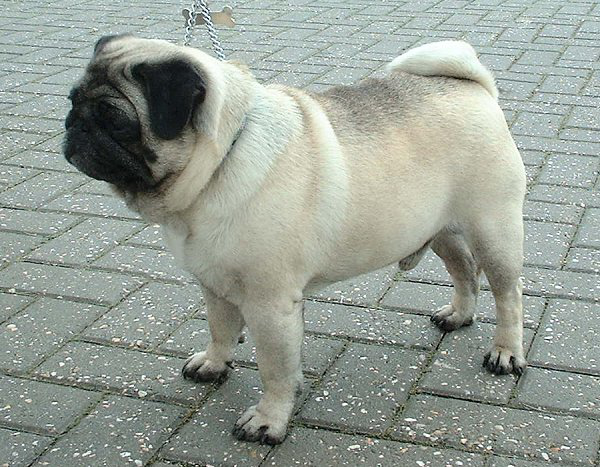

In [33]:
img_test

In [34]:
# Prepare the image
image_resized = prepare_image(img_test, (150,150))

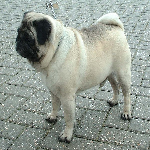

In [35]:
image_resized

In [45]:
x = np.array(image_resized)
X = np.array([x])
X.shape

(1, 150, 150, 3)

In [70]:
# Preprocess the image 
img_prepr = np.float32(X*(1./255))

In [71]:
img_prepr

array([[[[0.7058824 , 0.77254903, 0.7490196 ],
         [0.69411767, 0.7607843 , 0.7294118 ],
         [0.6313726 , 0.69803923, 0.6666667 ],
         ...,
         [0.7647059 , 0.8509804 , 0.8392157 ],
         [0.68235296, 0.74509805, 0.74509805],
         [0.6745098 , 0.76862746, 0.7764706 ]],

        [[0.5254902 , 0.5921569 , 0.5686275 ],
         [0.7372549 , 0.8039216 , 0.78039217],
         [0.60784316, 0.6745098 , 0.6431373 ],
         ...,
         [0.7921569 , 0.8666667 , 0.85882354],
         [0.6313726 , 0.7019608 , 0.6392157 ],
         [0.7882353 , 0.8784314 , 0.85490197]],

        [[0.6862745 , 0.7490196 , 0.7372549 ],
         [0.61960787, 0.6862745 , 0.6627451 ],
         [0.64705884, 0.7137255 , 0.68235296],
         ...,
         [0.6       , 0.65882355, 0.64705884],
         [0.627451  , 0.69411767, 0.654902  ],
         [0.7058824 , 0.79607844, 0.77254903]],

        ...,

        [[0.5803922 , 0.61960787, 0.58431375],
         [0.49019608, 0.5254902 , 0.5058824 ]

### Question 4

Now let's apply this model to this image. What's the output of the model?

**Answer:** 0.770491

In [72]:
interpreter.set_tensor(input_index, img_prepr)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [73]:
classes = [
    'cat',
    'dog'
]

dict(zip(classes, preds[0]))

{'cat': 0.770491}

## Prepepare the lambda code 

Now you need to copy all the code into a separate python file. You will 
need to use this file for the next two questions.

Tip: you can test this file locally with `ipython` or Jupyter Notebook 
by importing the file and invoking the function from this file.  


## Docker 

For the next two questions, we'll use a Docker image that I already 
prepared. This is the Dockerfile that I used for creating the image:

```docker
FROM public.ecr.aws/lambda/python:3.8
COPY cats-dogs-v2.tflite .
```

And pushed it to [`agrigorev/zoomcamp-cats-dogs-lambda:v2`](https://hub.docker.com/r/agrigorev/zoomcamp-cats-dogs-lambda/tags).


> Note: The image already contains a model and it's not the same model
> as the one we used for questions 1-4.


## Question 5

Now let's extend this docker image, install all the required libraries
and add the code for lambda.

You don't need to include the model in the image. It's already included. 
The name of the file with the model is `cats-dogs-v2.tflite` and it's 
in the current workdir in the image (see the Dockerfile above for the 
reference).


What's the image id of the base image? 

In the build logs (on Linux), you'll see a log like that:

```
$ docker some-command-for-building
Sending build context to Docker daemon  2.048kB
Step 1/N : FROM agrigorev/zoomcamp-cats-dogs-lambda:v2
 ---> XXXXXXXXXXXX
Step 2/N : ....
```

You need to get this `XXXXXXXXXXXX`. 

On MacOS and Windows, the logs for `docker build` are different. 
To get the image id there, you can use `docker image ls -a`.

**Answer:** The ima id is 322fc756f258

## Question 6

Now run the container locally.

Score this image: https://upload.wikimedia.org/wikipedia/commons/1/18/Vombatus_ursinus_-Maria_Island_National_Park.jpg

What's the output from the model? 

**Answer:** 'cat': 0.5413472652435303